## 0. 텐서플로우 메모리 관리

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)

## 1. 패키지 로드

In [3]:
import os
import numpy as np
from ResNet50.resnet50 import ResNet50
from keras.layers import Input
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

## 2. 함수 정의

### 1) feature 추출 및 임베딩 함수

In [4]:
def get_feature_vector_fromPIL(img):
    feature_vector = feature_model.predict(img)
    a, b, c, n = feature_vector.shape
    feature_vector= feature_vector.reshape(b,n)
    return feature_vector

### 2) cosine 유사도 계산

In [5]:
def calculate_similarity_cosine(vector1, vector2):
    return cosine_similarity(vector1, vector2)

## 3. Test

### 1) ResNet50 Model Load

In [6]:
image_input = Input(shape=(224, 224, 3))
feature_model = ResNet50(input_tensor=image_input, include_top=False, weights='imagenet')

### 2) 이미지 로드

In [7]:
from PIL import Image
import PIL.Image
import PIL.ImageFile
import matplotlib.pyplot as plt

In [8]:
actor_image_path = '../image_data/Actor/'
actor2webtoon_image_path = '../image_data/Actor2Webtoon/'
webtoon_image_path = '../image_data/Webtoon/'

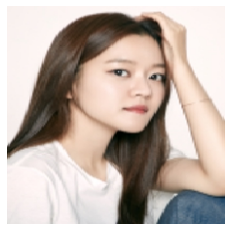

In [9]:
actor_image = image.load_img(actor_image_path + '고아성.jpg', target_size=(224, 224))
plt.imshow(actor_image)
plt.axis('off')
plt.show()

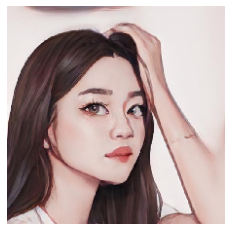

In [10]:
actor2webtoon_image = image.load_img(actor2webtoon_image_path + 'webtoon_고아성.jpg', target_size=(224, 224))
plt.imshow(actor2webtoon_image)
plt.axis('off')
plt.show()

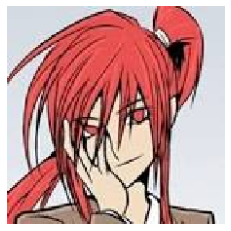

In [11]:
webtoon_image = image.load_img(webtoon_image_path + '폭풍의전학생_이연희.jpg', target_size=(224, 224))
plt.imshow(webtoon_image)
plt.axis('off')
plt.show()

### 3) 이미지 전처리

In [12]:
image_data_list = [actor_image, actor2webtoon_image, webtoon_image]
img_data_list = []

for img in image_data_list:
    #img_path = data_path + '/'+ dataset
    #img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

### 3) cosine 유사도 계산

In [13]:
actor_actor2webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[1]))
actor_webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[2]))
actor2webtoon_webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[1]), 
                                                      get_feature_vector_fromPIL(img_data_list[2]))
print('ResNet50 actor_actor2webtoon similarity_cosine: {:.2f}%'.format(actor_actor2webtoon[0][0]*100))
print('ResNet50 actor_webtoon similarity_cosine: {:.2f}%'.format(actor_webtoon[0][0]*100))
print('ResNet50 actor2webtoon_webtoon similarity_cosine: {:.2f}%'.format(actor2webtoon_webtoon[0][0]*100))

ResNet50 actor_actor2webtoon similarity_cosine: 73.32%
ResNet50 actor_webtoon similarity_cosine: 34.60%
ResNet50 actor2webtoon_webtoon similarity_cosine: 41.26%


## 4. 비슷하다고 생각되는 이미지 테스트

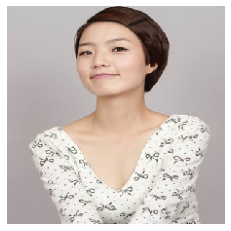

In [14]:
actor_image = image.load_img(actor_image_path + '안영미.jpg', target_size=(224, 224))
plt.imshow(actor_image)
plt.axis('off')
plt.show()

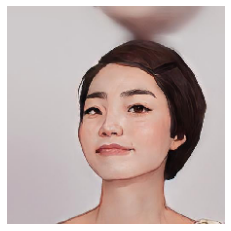

In [15]:
actor2webtoon_image = image.load_img(actor2webtoon_image_path + 'webtoon_안영미.jpg', target_size=(224, 224))
plt.imshow(actor2webtoon_image)
plt.axis('off')
plt.show()

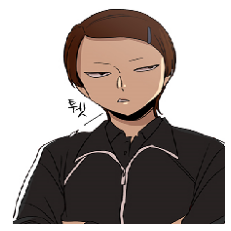

In [16]:
webtoon_image = image.load_img(webtoon_image_path + '뷰티풀군바리_허정인.jpg', target_size=(224, 224))
plt.imshow(webtoon_image)
plt.axis('off')
plt.show()

In [17]:
image_data_list = [actor_image, actor2webtoon_image, webtoon_image]
img_data_list = []

for img in image_data_list:
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

In [18]:
actor_actor2webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[1]))
actor_webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[2]))
actor2webtoon_webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[1]), 
                                                      get_feature_vector_fromPIL(img_data_list[2]))
print('ResNet50 actor_actor2webtoon similarity_cosine: {:.2f}%'.format(actor_actor2webtoon[0][0]*100))
print('ResNet50 actor_webtoon similarity_cosine: {:.2f}%'.format(actor_webtoon[0][0]*100))
print('ResNet50 actor2webtoon_webtoon similarity_cosine: {:.2f}%'.format(actor2webtoon_webtoon[0][0]*100))

ResNet50 actor_actor2webtoon similarity_cosine: 67.62%
ResNet50 actor_webtoon similarity_cosine: 44.23%
ResNet50 actor2webtoon_webtoon similarity_cosine: 49.54%


## 5. 동일 인물 다른 사진 비교

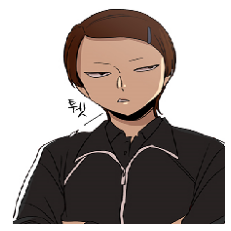

In [19]:
webtoon_image_1 = image.load_img(webtoon_image_path + '뷰티풀군바리_허정인.jpg', target_size=(224, 224))
plt.imshow(webtoon_image_1)
plt.axis('off')
plt.show()

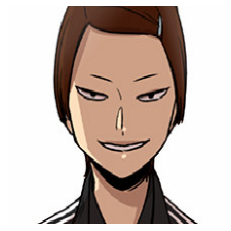

In [21]:
webtoon_image_2 = image.load_img(webtoon_image_path + '뷰티풀군바리_허정인2.jpg', target_size=(224, 224))
plt.imshow(webtoon_image_2)
plt.axis('off')
plt.show()

In [22]:
image_data_list = [webtoon_image_1, webtoon_image_2]
img_data_list = []

for img in image_data_list:
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

In [23]:
webtoon_webtoon = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[1]))

In [24]:
print('ResNet50 webtoon_webtoon similarity_cosine: {:.2f}%'.format(webtoon_webtoon[0][0]*100))

ResNet50 webtoon_webtoon similarity_cosine: 72.07%


## 6. 등장인물 하나와 다른 배우 비교

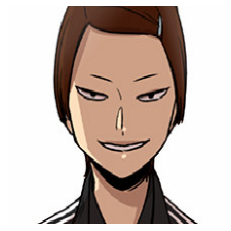

In [25]:
webtoon_image = image.load_img(webtoon_image_path + '뷰티풀군바리_허정인2.jpg', target_size=(224, 224))
plt.imshow(webtoon_image_2)
plt.axis('off')
plt.show()

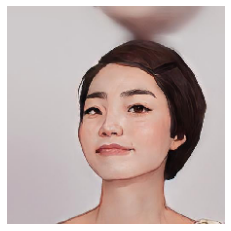

In [26]:
actor2webtoon_image_1 = image.load_img(actor2webtoon_image_path + 'webtoon_안영미.jpg', target_size=(224, 224))
plt.imshow(actor2webtoon_image_1)
plt.axis('off')
plt.show()

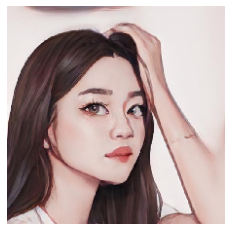

In [27]:
actor2webtoon_image_2 = image.load_img(actor2webtoon_image_path + 'webtoon_고아성.jpg', target_size=(224, 224))
plt.imshow(actor2webtoon_image_2)
plt.axis('off')
plt.show()

In [28]:
image_data_list = [webtoon_image, actor2webtoon_image_1, actor2webtoon_image_2]
img_data_list = []

for img in image_data_list:
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

In [29]:
webtoon_actor1 = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[1]))
webtoon_actor2 = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), 
                                                      get_feature_vector_fromPIL(img_data_list[2]))

In [31]:
print('ResNet50 허정인 vs 안영미 similarity_cosine: {:.2f}%'.format(webtoon_actor1[0][0]*100))
print('ResNet50 허정인 vs 고아성 similarity_cosine: {:.2f}%'.format(webtoon_actor2[0][0]*100))

ResNet50 허정인 vs 안영미 similarity_cosine: 54.89%
ResNet50 허정인 vs 고아성 similarity_cosine: 60.73%


- 평가
    - 배경제거 후 유사도 측정해보기
    - Gray로 측정해보기

## 7. threshold 적용 후 측정